In [3]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JBC4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
input_file_name = 'ope_nuclepedia.txt'
output_img_name = 'ope_nuclepedia.png'
output_file_name = 'ope_nuclepedia_results.xlsx'

In [34]:
#open text file in read mode
text_file = open(input_file_name, "r",encoding="utf8")
 
#read whole file to a string
data = text_file.read()
 
#close file
text_file.close()
 

In [35]:
data = data.lower()
print(data)

the nrc and nrr have been tracking reactor events for many years.  after the detection of severe vessel head degradation at the davis-besse nuclear power plant, the nrc revamped its methods for collecting, analyzing, and communicating operational events.  the nrc formally established the operating experience branch in january 2005 as a result of recommendations by the davis-besse lessons learned task force.

in 2002, the davis-besse lessons learned task force identified substantial shortcomings in agency operating experience activities.  this finding led nrr and res to jointly charter an interoffice reactor operating experience task force (roetf) to formally assess agency operating experience activities and to recommend specific program improvements.  appendix a to the roetf final report, “reactor operating experience task force report,” issued november 2003 (ml033350063) lists 24 specific recommendations for improving agency activities to collect, evaluate, communicate, and apply oper

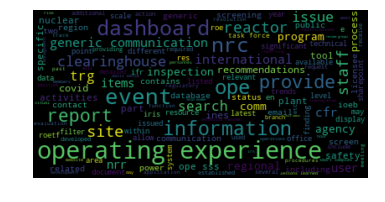

In [36]:
# Display the generated image:
wordcloud = WordCloud().generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
text = data
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [38]:
filtered = ''
filtered_list = []
for word in tokens_without_sw:
    if len(word) > 4 and word.upper() != 'THE' and word.upper() != 'THEY' and word.upper() != 'WE' and word.upper() != "U.S." and word.upper() != 'THIS' and word.upper() != 'THEY':
        filtered = filtered + ' ' + word
        filtered_list.append(word)

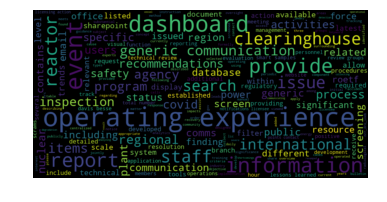

In [39]:
# Display the generated image:
wordcloud = WordCloud(width=1200, height=600).generate(filtered)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
wordcloud.to_file(output_img_name)


In [41]:
df = pd.DataFrame(filtered_list, columns = ['words'])

In [42]:
unique_words = df.words.unique()

In [43]:
unique_word_count = df.words.value_counts()
print(unique_word_count)

operating          34
experience         32
information        21
reports            16
dashboard          15
generic            15
staff              14
event              14
clearinghouse      13
events             11
reactor            11
search             11
communications     11
international      10
provides           10
items               9
dashboards          9
provide             9
regional            8
program             8
agency              7
issues              7
recommendations     7
process             7
technical           7
safety              6
users               6
nuclear             6
activities          6
issue               6
                   ..
majority            1
range               1
emails              1
consider            1
appear              1
participates        1
upcoming            1
month               1
volunteer           1
oecd/nea            1
immediate           1
component           1
publishing          1
facilitate          1
initiating

In [44]:
pd.DataFrame(df.words.value_counts()).to_excel(output_file_name) 
